In [2]:
from tensorflow.keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
print(loaded_model)

Loaded model from disk


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#read the test image
im = cv2.imread('./test.jpg')

#convert image to grayscale format
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

cv2.imshow("original",im)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
imgray=~imgray
#apply binary thresholding
ret,thresh = cv2.threshold(imgray,100,250,cv2.THRESH_BINARY)

cv2.imshow("Binary image",thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(thresh.shape)

(532, 872)


In [5]:
#detect contours on binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[-2:]
#contour retrieval mode used - RETR_TREE - retrieves all of the contours and reconstructs a full hierarchy of nested contours.
#cv2.CHAIN_APPROX_NONE - This will keep all the contour points whenever it runs through any boundary lines. 

print(len(contours))

32


In [6]:
sorted_contours=sorted(contours, key=lambda contour: cv2.boundingRect(contour)[0])

In [7]:
print(imgray.shape)
w= int(500)
h= int(800)
train_data= []

(532, 872)


In [8]:
rectangles= []
for c in sorted_contours:
    x,y,w,h= cv2.boundingRect(c)
    rect= [x,y,w,h]
    rectangles.append(rect)
    
print(rectangles)

[[170, 200, 18, 103], [186, 205, 1, 1], [239, 240, 1, 1], [250, 215, 72, 80], [279, 286, 3, 3], [281, 287, 5, 5], [293, 290, 3, 3], [363, 303, 1, 1], [382, 218, 48, 91], [392, 239, 3, 3], [393, 238, 3, 3], [401, 294, 1, 1], [411, 266, 6, 5], [475, 223, 66, 96], [482, 234, 4, 3], [484, 228, 3, 3], [486, 239, 1, 1], [503, 250, 1, 1], [512, 249, 3, 3], [515, 247, 3, 3], [517, 247, 3, 3], [522, 255, 1, 1], [582, 230, 67, 97], [589, 238, 54, 81], [595, 232, 3, 3], [620, 249, 3, 3], [630, 255, 3, 3], [631, 256, 3, 3], [632, 258, 6, 7], [634, 265, 3, 3], [635, 266, 3, 3], [636, 268, 3, 3]]


In [9]:
#i[0] = x
#i[1] = y
#i[2] = w
#i[3] = h
bool_rect=[]

for i in rectangles:
    l=[] #list is made empty everytime i value changes
    
    for j in rectangles:
        flag=0 #reset flag to 0 everytime loop runs
        if i!=j:
            if i[0]<(j[0]+j[2]) and j[0]<(i[0]+i[2]) and i[1]<(j[1]+j[3]) and j[1]<(i[1]+i[3]):
                flag=1
            l.append(flag)
        else:
            l.append(0)
        
    bool_rect.append(l) #append this list everytime j loop breaks and i value is going to change.
                        #therefore there will be 'i'no. of lists inside bool_rect, and each list will
                        #have 'j' no. of elements.

print(bool_rect)

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 

In [10]:
discard_rect=[]

for i in range(0, len(sorted_contours)):
    for j in range(0, len(sorted_contours)):
        if bool_rect[i][j] ==1:
            areai = rectangles[i][2]*rectangles[i][3] #w*h
            areaj = rectangles[j][2]*rectangles[j][3]
            if areai == min(areai, areaj):
                discard_rect.append(rectangles[i])
                
#discard_rect will have repeated values
print(discard_rect)

[[186, 205, 1, 1], [279, 286, 3, 3], [279, 286, 3, 3], [281, 287, 5, 5], [293, 290, 3, 3], [392, 239, 3, 3], [392, 239, 3, 3], [393, 238, 3, 3], [393, 238, 3, 3], [401, 294, 1, 1], [411, 266, 6, 5], [482, 234, 4, 3], [484, 228, 3, 3], [486, 239, 1, 1], [503, 250, 1, 1], [512, 249, 3, 3], [515, 247, 3, 3], [515, 247, 3, 3], [517, 247, 3, 3], [517, 247, 3, 3], [522, 255, 1, 1], [589, 238, 54, 81], [595, 232, 3, 3], [620, 249, 3, 3], [620, 249, 3, 3], [630, 255, 3, 3], [630, 255, 3, 3], [630, 255, 3, 3], [631, 256, 3, 3], [631, 256, 3, 3], [631, 256, 3, 3], [631, 256, 3, 3], [632, 258, 6, 7], [632, 258, 6, 7], [634, 265, 3, 3], [634, 265, 3, 3], [634, 265, 3, 3], [635, 266, 3, 3], [635, 266, 3, 3], [635, 266, 3, 3], [635, 266, 3, 3], [636, 268, 3, 3], [636, 268, 3, 3], [636, 268, 3, 3]]


In [11]:
final_rect = [i for i in rectangles if i not in discard_rect]
print(final_rect)

[[170, 200, 18, 103], [239, 240, 1, 1], [250, 215, 72, 80], [363, 303, 1, 1], [382, 218, 48, 91], [475, 223, 66, 96], [582, 230, 67, 97]]


In [12]:
for i in final_rect:
    x = i[0]
    y = i[1]
    w = i[2]
    h = i[3]
    
    im_crop = thresh[y:y+h, x:x+w]
    
    im_resize = cv2.resize(im_crop,(45,45))
    cv2.imshow("image",im_resize)
    cv2.waitKey(5)
    cv2.destroyAllWindows()

    im_resize=np.reshape(im_resize,(45,45,1))
    train_data.append(im_resize)

In [14]:
print(len(train_data))
a = len(train_data)

7


In [15]:
final = []
for i in range (len(train_data)):
    img = np.array(train_data[i])
    img = np.resize(img, (45,45))
    h, w = img.shape
    c = 0
    for j in range (h):
        for k in range (w):
            if img[j][k] == 250:
                c+=1
    if c == np.size(img):
        pass
    else:
        final.append(train_data[i])

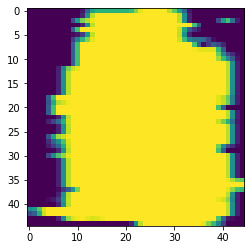

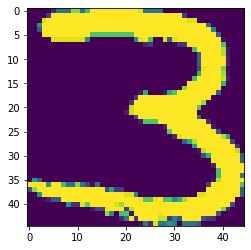

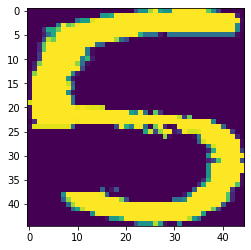

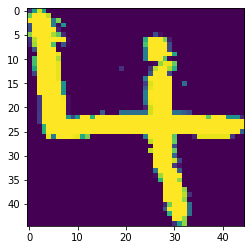

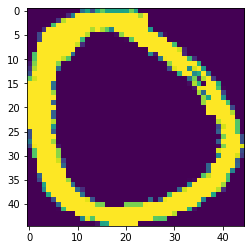

In [16]:
for i in range (len(final)):
    img = np.resize(final[i], (45,45))
    plt.imshow(img)
    plt.show()
    
train_data = final

In [26]:
import tensorflow
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(-1,45,45,1)
    result=loaded_model.predict(train_data[i])
    model = tensorflow.keras.models.load_model('./solver.h5')
    r2 = model.predict(train_data[i])
    result=np.argmax(result)
    print(result)
    print(r2)
#     img = np.resize(train_data[i], (45,45))
#     plt.imshow(img)
#     plt.show()
#     if(result[0]==0):
#         s=s+'+'
#     if(result[0]==1):
#         s=s+'-'
#     if(result[0]==2):
#         s=s+'0'
#     if(result[0]==3):
#         s=s+'1'
#     if(result[0]==4):
#         s=s+'2'
#     if(result[0]==5):
#         s=s+'3'
#     if(result[0]==6):
#         s=s+'4'
#     if(result[0]==7):
#         s=s+'5'
#     if(result[0]==8):
#         s=s+'6'
#     if(result[0]==9):
#         s=s+'7'
#     if(result[0]==10):
#         s=s+'8'
#     if(result[0]==11):
#         s=s+'9'
#     if(result[0]==12):
#         s=s+'='
#     if(result[0]==13):
#         s=s+'x'
#     if(result[0]==14):
#         s=s+'cos'
#     if(result[0]==15):
#         s=s+'/'
#     if(result[0]==16):
#         s=s+'log'
#     if(result[0]==17):
#         s=s+'sin'
#     if(result[0]==18):
#         s=s+'sqrt'
#     if(result[0]==19):
#         s=s+'tan'
#     if(result[0]==20):
#         s=s+'*'
#     if(result[0]==21):
#         s=s+'y'
     

12
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
7
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
7
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
7
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
7
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


(402, 410, 3)
(1, 45, 45, 1)


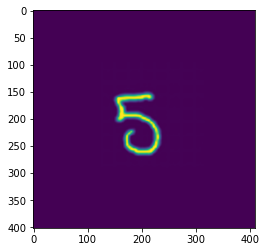

In [27]:
img = cv2.imread('./5.png')
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.array(img)
img = ~img
imgl = np.resize(img, (45,45))
imgl = imgl.reshape((-1,45,45,1))
print(imgl.shape)
plt.imshow(img)
plt.show()

In [30]:
res = model.predict(imgl)
print(np.argmax(res))

4
